# Data Visualization

One of the best ways to communicate what is happening in your dataset is through visualizations. Visualizations make it easy for a human to understand millions of rows of data at a glance. Today we will go through basics of the [Seaborn library](https://seaborn.pydata.org/).

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

To install seaborn we need to run either:

```
pip install seaborn
```

or:

```
conda install seaborn
```

Let's start by importing packages:

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's read our PoKeMoN dataset. Below you can see the column descriptions:

| Column | Description |
| :--- | :--- |
| `Name` | The name of the pokemon |
| `Type 1` | The type of the pokemon we will use |
| `Type 2` | Later generations were using dual types, we won't be using this here |
| `Total` | The sum of all stat columns |
| `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed` | Pokemon stats |
| `Generation` | When was this pokemon introduced |
| `Legendary` | Is the pokemon a Legendary pokemon |

In [2]:
pokemon = pd.read_csv(
    "datasets_121_280_Pokemon.csv",
    index_col="#",
)
pokemon.sample(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
555,DarmanitanStandard Mode,Fire,NaN,480,105,140,55,30,55,95,5,False
106,Hitmonlee,Fighting,NaN,455,50,120,53,35,110,87,1,False
198,Murkrow,Dark,Flying,405,60,85,42,85,42,91,2,False


We will setup the standard Seaborn theme by running the following command:

In [3]:
sns.set()

## Line plots

One of the basic types of plots are line plots. Those are handled in seaborn by the `lineplot` function. By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.

Full documentation of `lineplot` is available [here](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot).

Let's see how the Total stats changed over the generations.

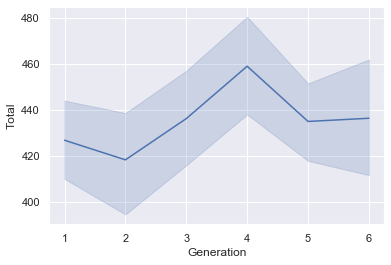

In [4]:
sns.lineplot(
    x="Generation",
    y="Total",
    data=pokemon,
)

We can have multiple values on a line plot as well. A useful technique to visualize multiple columns is melting the dataframe. Then we can just use `value` for the actual value of the column, and `variable` for the label as `hue`. The `ci` parameter hides the estimator shade you could see above.

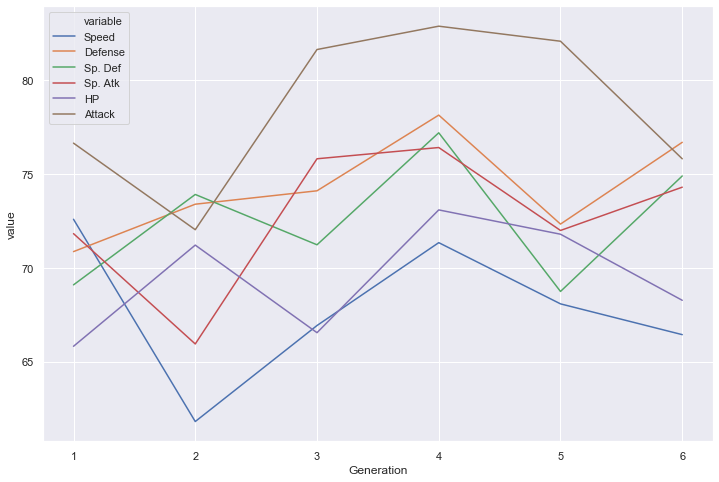

In [5]:
# We melt the values, so that it is useful for data viz
generation_values = pd.melt(
    pokemon,
    id_vars=["Generation"],
    value_vars=["Speed", "Defense", "Sp. Def", "Sp. Atk", "HP", "Attack"],
)

fig, ax = plt.subplots()
sns.lineplot(
    x="Generation",
    y="value",
    hue="variable",
    ci=None,
    data=generation_values,
)
fig.set_size_inches(12, 8)


# Bar plots

Another often used type of a plot is the Bar plot. You might remember the use of it in pandas:

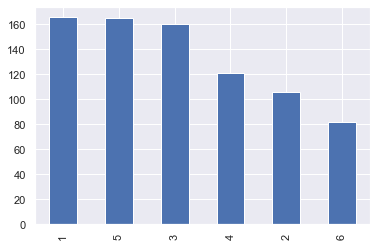

In [6]:
# Bar plot using pandas
pokemon["Generation"].value_counts().plot.bar()

We will use Seaborn `barplot` function to create bar plots. Here you can see an example of an attack `Total` bar plot depending on the `Generation`. The whiskers (vertical black lines), show the estimation error. Ideally there would be no estimation error, but we work with what we got.

Full documentation of `barplot` is available [here](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot).

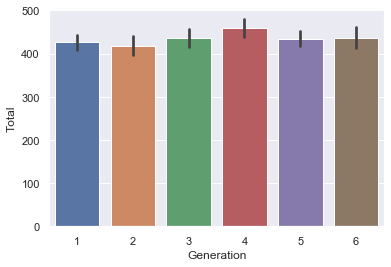

In [7]:
sns.barplot(
    x="Generation",
    y="Total",
    data=pokemon,
)

A nice alternative to this, is the `countplot`, which automatically counts things in the bucket. Countplot documentation is available [here](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot).

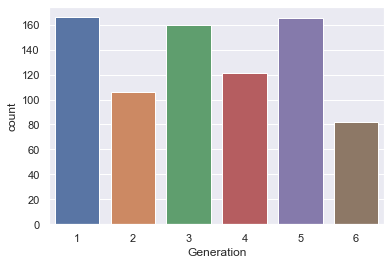

In [8]:
sns.countplot(
    "Generation",
    data=pokemon,
)

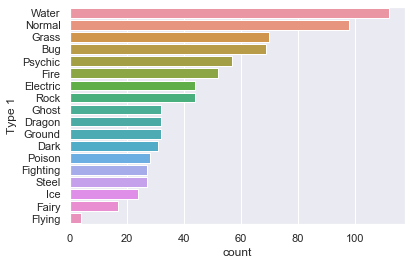

In [9]:
sns.countplot(
    y="Type 1",
    order=pokemon["Type 1"].value_counts().index,
    data=pokemon,
)

## Categorical plot

A nice way to create a plot is to use the `catplot` function. This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use like stripplots, swarms, boxplots, barplots and more. We will use a barplot here, to show the `Total` means over `Generation` depending whether the pokemon was `Legendary` or not.

Full documentation on `catplot` is available [here](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot).

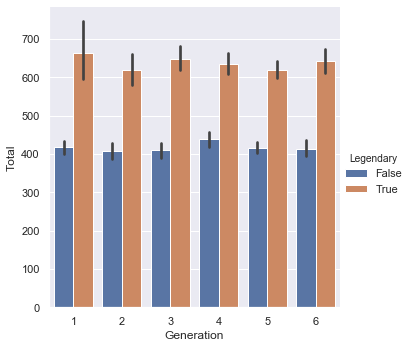

In [10]:
sns.catplot(
    x="Generation",
    y="Total",
    hue="Legendary",
    kind="bar",
    data=pokemon,
)

## Scatter plot

Scatter plot is a relational plot, that shows the relation based on the `x` and `y` value. The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

Full documentation on `scatterplot` is available [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot).

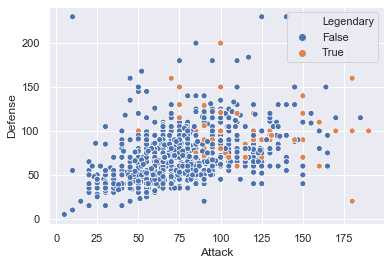

In [11]:
sns.scatterplot(
    x="Attack",
    y="Defense",
    hue="Legendary",
    data=pokemon,
)

## Swarm plot

A simillar plot to scatter is the swarm plot. It shows you the count distribution over a numerical range. Here we categorize the swarmplot by `Generation` to see what was the distribution of starter types (water, fire, grass) pokemon over the generations. We are also adding a `palette` to colour them accordingly.

The full documentation for `swarmplot` is available [here](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot).

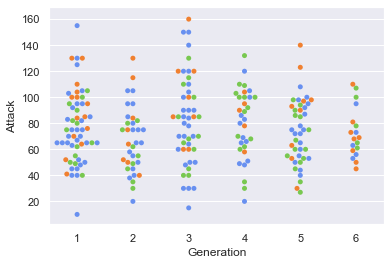

In [12]:
starter_types = ["Water", "Fire", "Grass"]
palette = {
    "Water": "#6890F0",
    "Fire": "#F08030",
    "Grass": "#78C850",
}

g = sns.swarmplot(
    x="Generation",
    y="Attack",
    hue="Type 1",
    palette=palette,
    data=pokemon[pokemon["Type 1"].isin(starter_types)],
)
g.legend_.remove()

## Distribution plots

A good way to show what is happening with our data is to show the distribution. The basic method to do that is the `distplot`. Below we can see the distribution of values for the `Total` column. We can see that most pokemon have around 500 and 300 `Total` power. The line you can see is the KDE = Kernel Density Estimation, a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

Full documentation for the `distplot` is available [here]().

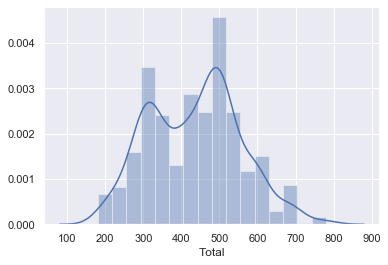

In [13]:
sns.distplot(pokemon["Total"])

To see how our data distribution is happening through the dataset, we can also use the `boxplot`. This is a fun little graph that shows us many parameters of the selected column. Here we selected the `Total` values and groupped them by `Generation`. What elements we have here:

- The box is where most of the values land.
- The line in the middle of the box is the mean value.
- The lower end of the box is the 1st quartile.
- The upper end of the box is the 3rd quartile.
- Whiskers show minimum and maximum values.
- The little diamond is an outlier value.

The full documentation on the `boxplot` is available [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

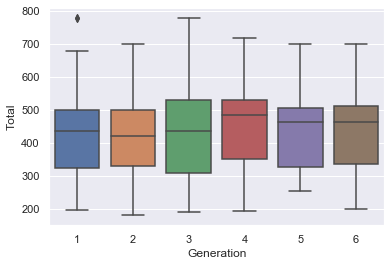

In [14]:
sns.boxplot(
    x="Generation",
    y="Total",
    data=pokemon,
)

## Cluster maps

Cluster maps are a good way to show correlation between variables in the dataset. Here I selected all of the Pokemon stats and created a correlation matrix of them. You can easily see, which ones correlate with each other and in what way due to the clustering (above and left). Clustermaps are there to show you a hierarchical overview of the data.

The full documentation for `clustermap` is available [here](https://seaborn.pydata.org/generated/seaborn.clustermap.html).

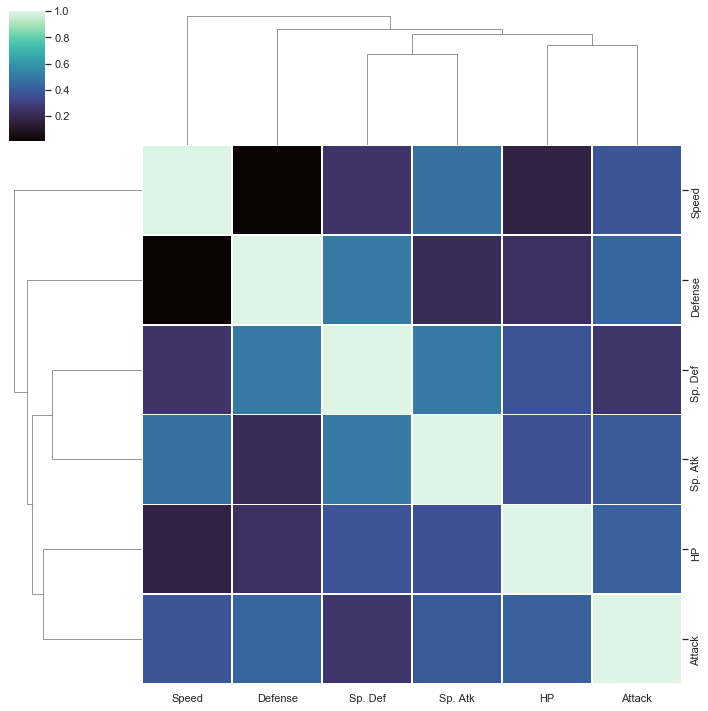

In [15]:
stats = ["Speed", "Defense", "Sp. Def", "Sp. Atk", "HP", "Attack"]
sns.clustermap(
    pokemon[stats].corr(),
    cmap="mako",
    linewidths=.75,
)

# Exercises

1. Read in the `avocado.csv` dataset
   - Set the index properly
2. Create a line plot showing the average price of avocado over months
3. Create a horizontal bar plot showing 10 highest mean prices depending on region
4. Create a count plot for the year of the avocado
5. Create a scatter plot of average price vs `Total Volume` for year 2018, when the `Total Volume` is lower than `1e6`
6. Show the `AveragePrice` distribution.
7. Create a clustermap of avocado correlations.
8. Show a boxplot of average price per year.

In [16]:
avocado = pd.read_csv("avocado.csv", index_col = 0,)

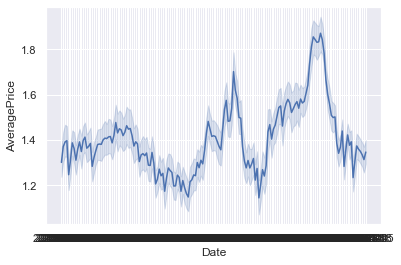

In [17]:
sns.lineplot(
    x = "Date",
    y = "AveragePrice",
    data = avocado,
)

Text(0.5, 0, 'mean prices')

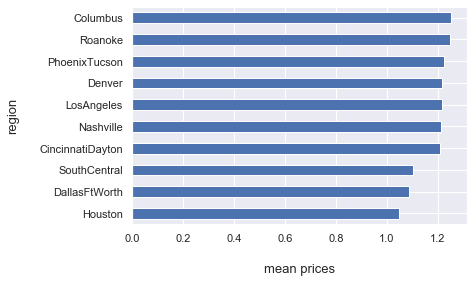

In [18]:
t = avocado.groupby('region').AveragePrice.mean().sort_values().head(10).plot(kind = 'barh')
t.set_ylabel('region', labelpad=20, size=13)
t.set_xlabel('mean prices', labelpad=20, size=13)

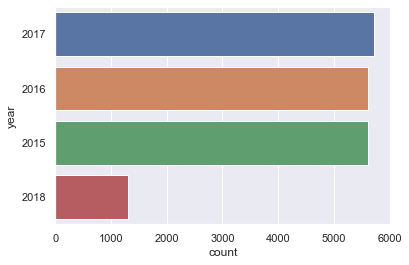

In [19]:
sns.countplot(
    y = "year",
    order = avocado["year"].value_counts().index,
    data = avocado,
)

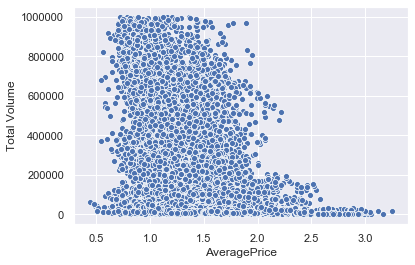

In [20]:
sns.scatterplot(
    x = "AveragePrice",
    y = "Total Volume",
    data = avocado.loc[avocado['Total Volume'] < 1000000],
)

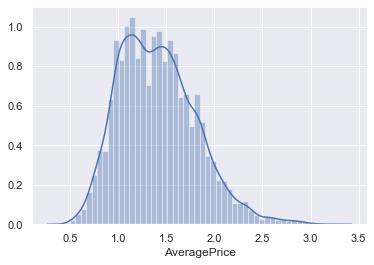

In [21]:
sns.distplot(avocado["AveragePrice"])

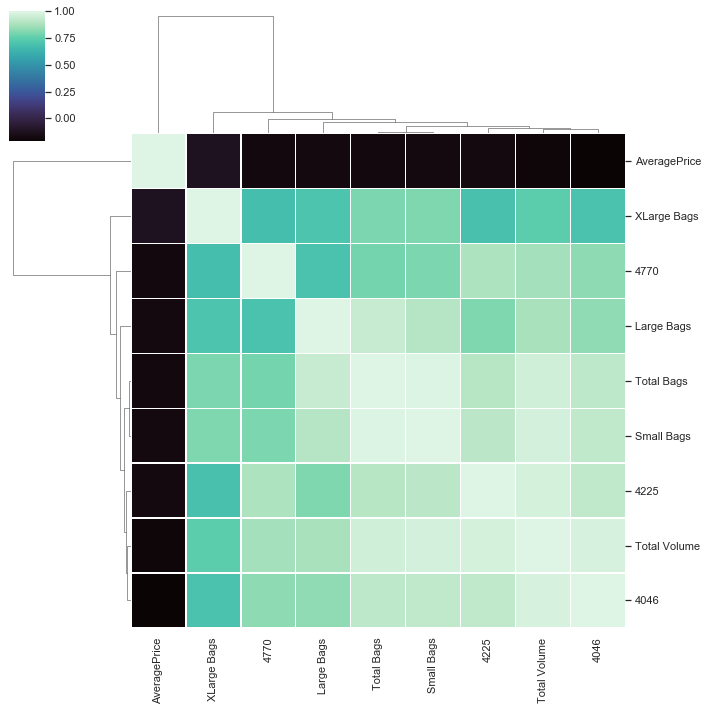

In [22]:
cm = ['AveragePrice', 'Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

sns.clustermap(
    avocado[cm].corr(),
    cmap="mako", 
    linewidths=.3,
)

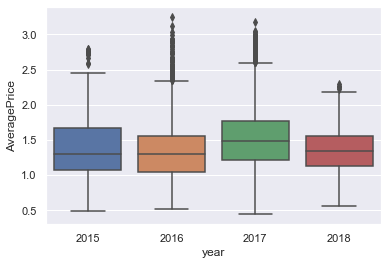

In [23]:
sns.boxplot(
    x='year',
    y='AveragePrice',
    data=avocado,
)